In [2]:
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('../data/patient_data.csv')
data.head()  

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,alzheimer
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  alzheimer          5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# Checking for missing values and handling
print(data.isnull().sum())

data['bmi'] = data['bmi'].replace('N/A', pd.NA)

data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['bmi'] = pd.to_numeric(data['bmi'], errors='coerce')

data['bmi'].fillna(data['bmi'].mean(), inplace=True)


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
alzheimer              0
dtype: int64


In [6]:
# Summary statistics for numerical columns
data.describe()



,id,age,hypertension,heart_disease,avg_glucose_level,bmi,alzheimer
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


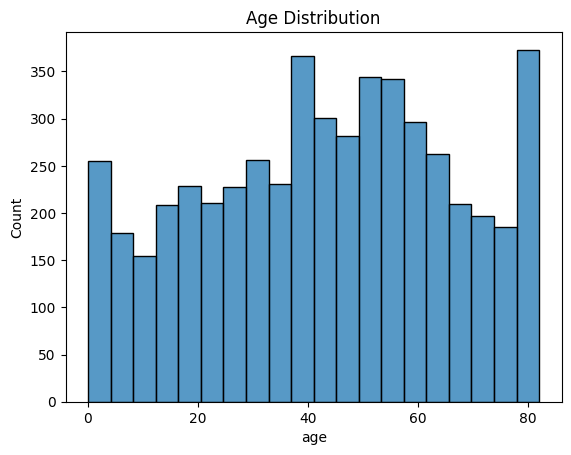

In [7]:
# Distribution of 'age' and 'avg_glucose_level'
sns.histplot(data['age'], bins=20)
plt.title('Age Distribution')
plt.show()



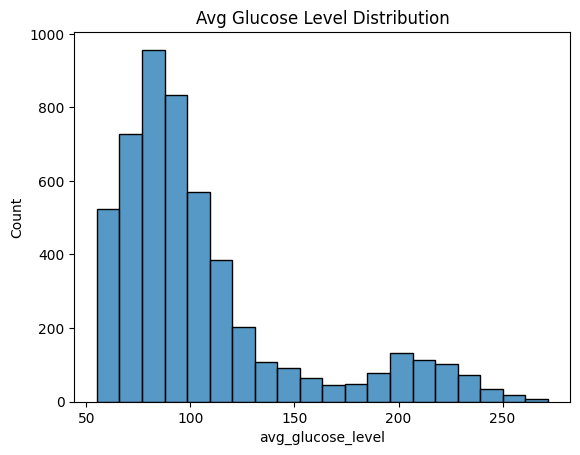

In [8]:
sns.histplot(data['avg_glucose_level'], bins=20)
plt.title('Avg Glucose Level Distribution')
plt.show()



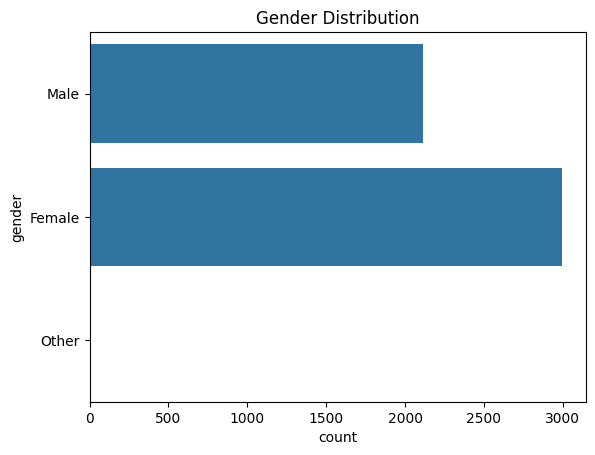

In [9]:
# Categorical column distributions
sns.countplot(data['gender'])
plt.title('Gender Distribution')
plt.show()



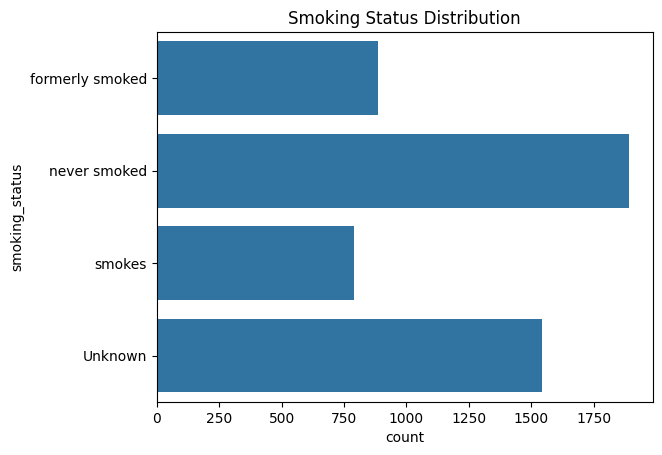

In [10]:
sns.countplot(data['smoking_status'])
plt.title('Smoking Status Distribution')
plt.show()



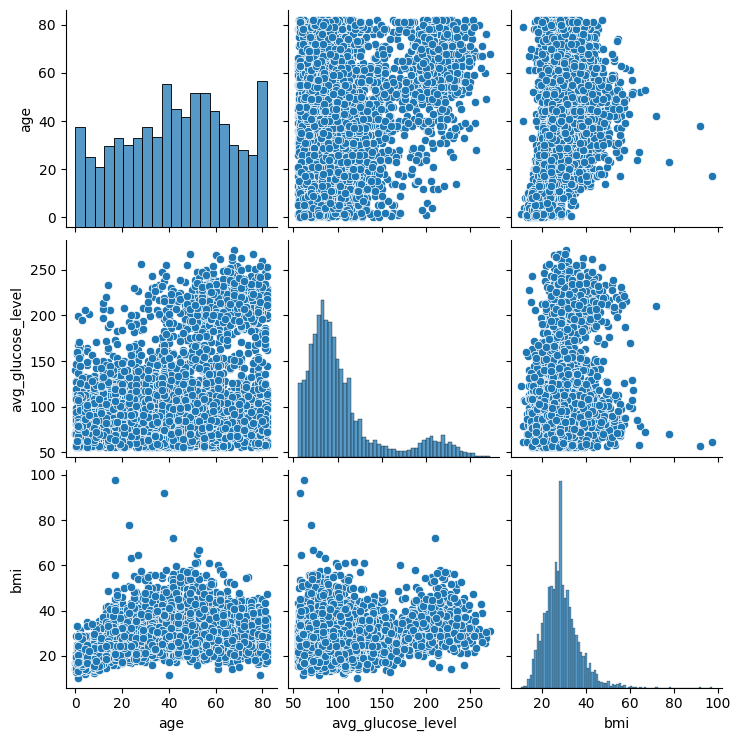

In [11]:
# Exploring relationships between numerical variables
sns.pairplot(data[['age', 'avg_glucose_level', 'bmi']])
plt.show()


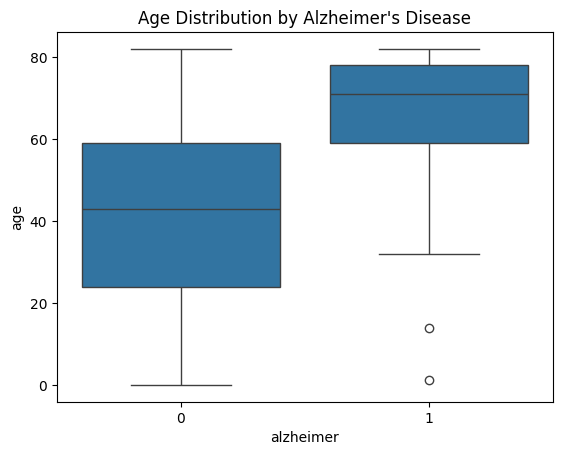

In [12]:
# Relationship between Age and Alzheimer's Disease
sns.boxplot(x='alzheimer', y='age', data=data)
plt.title('Age Distribution by Alzheimer\'s Disease')
plt.show()



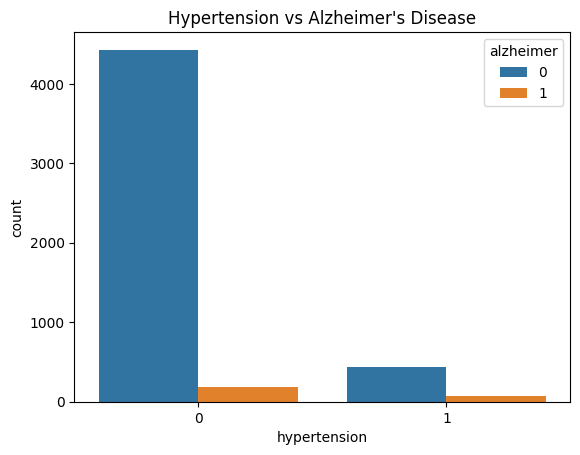

In [13]:
# Relationship between Hypertension and Alzheimer's Disease
sns.countplot(x='hypertension', hue='alzheimer', data=data)
plt.title('Hypertension vs Alzheimer\'s Disease')
plt.show()



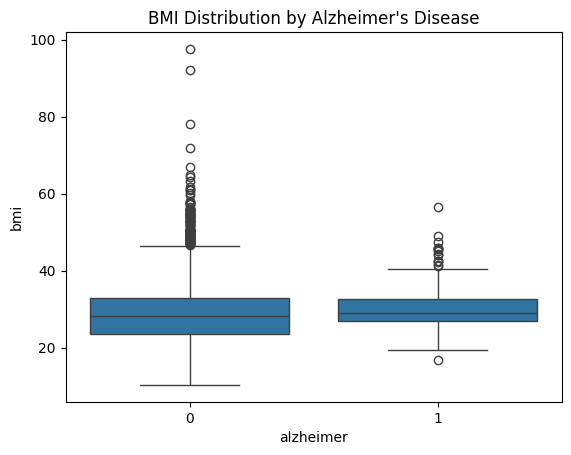

In [14]:
# Relationship between BMI and Alzheimer's Disease
sns.boxplot(x='alzheimer', y='bmi', data=data)
plt.title('BMI Distribution by Alzheimer\'s Disease')
plt.show()



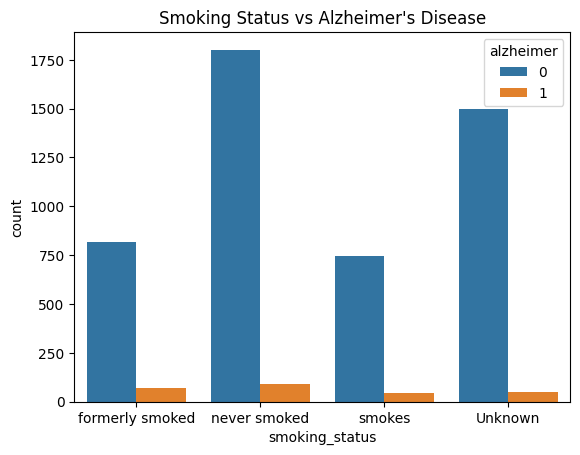

In [15]:
# Relationship between Smoking Status and Alzheimer's Disease
sns.countplot(x='smoking_status', hue='alzheimer', data=data)
plt.title('Smoking Status vs Alzheimer\'s Disease')
plt.show()
